[[ 43.25935103   0.15340509   4.45255378]
 [  0.15340509  10.57292828   0.15428114]
 [  4.45255378   0.15428114  47.12334533]]
[ 50.04614195  40.33776932  10.57171338]
[[ 0.54862373  0.83605889  0.00418753]
 [ 0.00539983  0.00146519 -0.99998435]
 [ 0.83605194 -0.54863776  0.00371074]]


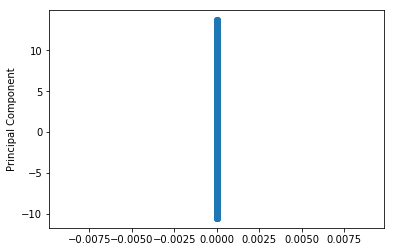

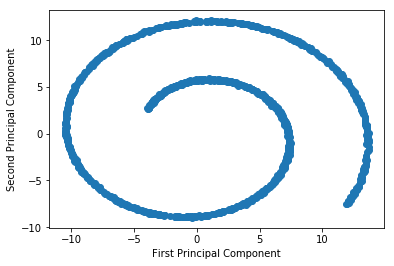

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import math
import pandas as pd

swiss=np.loadtxt('swissroll.txt')# Import data
swiss1=np.mean(swiss,axis=0) # Calculate the mean of data along the column
swissm=np.zeros((1500,3))# Define a matrix to store the (x-u) matrix
for i in range(1500):
    for j in range(3):
        swissm[i,j]=swiss[i,j]-swiss1[j] # Conduct data minus mean
cov=swissm.T@swiss/1500 # Calculate covariance matrix
print(cov)

eigenvalue,eigenvector=np.linalg.eig(cov) #Calculate the eigenvalue and eigenvectors of covariance matrix,这里是已经单位化的特征列向量
print(eigenvalue)
print(eigenvector)

p=swiss@(eigenvector[:,0:1]) # Project the data to principal component which has the largest eigenvalue
b=np.zeros((1500,1)) #Define zero vector to plot
plt.scatter(b,p)
plt.ylabel('Principal Component')
plt.show()

p=swiss@eigenvector[:,0:2] # Project the data to the 2 Principal Components，向多维投影就将特征值由大到小排序，并乘以对应的特征列向量拼成的矩阵
plt.scatter(p[:,0],p[:,1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

swiss=np.loadtxt('swissroll.txt')# Import data
scikit_pca = PCA(n_components = 2)#PCA包，括号内是要保留的维数
p = scikit_pca.fit_transform(swiss)#先单位化，减去均值，再做PCA